# Final Data Prep 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Import data


In [4]:
path_Scope_3_df = r"C:\Users\cliff\Downloads\Scope_3_df.csv"
dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Company Name", "Primary Stock Ticker",
        "Row_num", "Scope 3 Sources", "Evaluation Status", "Calculation Methodology",
        "Explanation"
    ]},
    **{col: float for col in [
        "Scope 3 Amount", "Perc emissions calculated w primary data",
        "Scope 1 2 total emission", "Scope 1 2 max", "Scope 1 2 Normalized",
        "Scope 3 max", "Scope 3 estimate", "Scope 3 Amount or Estimate"
    ]}
}

columns_to_drop = ['Scope 1 2 max', 'Scope 1 2 Normalized', 'Scope 3 max', 'Scope 3 estimate', 'Scope 3 Amount or Estimate']

Scope_3_df = pd.read_csv(path_Scope_3_df, dtype=dtype_dict, low_memory=False)

Scope_3_df = Scope_3_df.drop(columns=columns_to_drop)

In [5]:
print(f"Scope_3_df shape: {Scope_3_df.shape}")
Scope_3_df.head(5)

Scope_3_df shape: (914339, 16)


,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Calculation Methodology,Perc emissions calculated w primary data,Explanation,Scope 1 2 total emission
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,1,Purchased goods and services,Not evaluated,NaN,NaN,NaN,We do not have access to this data at this point in time. We are working towards evaluating Scope 3 emnissions for this category in the future.,406.35
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,2,Capital goods,Not evaluated,NaN,NaN,NaN,We do not have access to this data at this point in time. We are working towards evaluating Scope 3 emnissions for this category in the future.,406.35
2,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,3,Fuel-and-energy-related activities (not included in Scope 1 or 2),"Not relevant, explanation provided",0.00,NaN,NaN,We do not have any fuel or energy related activities beyond that declared in Scope 1 and 2 activities.,406.35
3,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,4,Upstream transportation and distribution,"Not relevant, explanation provided",0.00,NaN,NaN,NaN,406.35
4,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,Defra 2012,NaN,NaN,406.35


# Build Scope 3 Observation Chart

In [83]:
import pandas as pd
import numpy as np

grouped_scope3 = Scope_3_df.groupby('Scope 3 Sources').agg(
    total_count=('Scope 3 Amount', 'size'),
    non_null_count=('Scope 3 Amount', 'count'),
    mean_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')
                             .loc[lambda s: s > 0]).mean()),
    median_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')
                               .loc[lambda s: s > 0]).median()),
    std_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')
                            .loc[lambda s: s > 0]).std()),
    n_zeros=('Scope 3 Amount', lambda x: (pd.to_numeric(x, errors='coerce') == 0).sum()),
    over80_count=('Perc emissions calculated w primary data ',
                  lambda x: (pd.to_numeric(x, errors='coerce') >= 80).sum()),
    perc_over_80=('Perc emissions calculated w primary data ',
                  lambda x: (pd.to_numeric(x, errors='coerce') >= 80).sum() / len(x) * 100)
)

# percent non‐missing
grouped_scope3['non_null_percentage'] = (
    grouped_scope3['non_null_count'] 
    / grouped_scope3['total_count'] 
    * 100
)

# rename
grouped_scope3.rename(columns={
    'non_null_count': 'Non-missing Observations',
    'non_null_percentage': 'Pct of Observations Non-missing',
    'over80_count': 'Count of reported with Primary Data ≥80',
    'perc_over_80': 'Pct of reported with Primary Data ≥80%',
    'n_zeros': 'N Zeros',
    'mean_amount': 'Mean',
    'median_amount': 'Median',
    'std_amount': 'Standard Deviation'
}, inplace=True)

# new percent‐zero column
grouped_scope3['Pct of reported as Zero'] = (
    grouped_scope3['N Zeros']
    / grouped_scope3['Non-missing Observations']
    * 100
)

# drop helper
grouped_scope3.drop(columns='total_count', inplace=True)

# reorder
grouped_scope3 = grouped_scope3[[
    'Non-missing Observations',
    'Pct of Observations Non-missing',
    'Count of reported with Primary Data ≥80',
    'Pct of reported with Primary Data ≥80%',
    'N Zeros',
    'Pct of reported as Zero',
    'Mean',
    'Median',
    'Standard Deviation'
]]

# --- FORMAT COLUMNS ---
# 1) round the three stats to 2 decimals
grouped_scope3[['Mean','Median','Standard Deviation']] = (
    grouped_scope3[['Mean','Median','Standard Deviation']].round(2)
)

# 2) cast everything else to int
int_cols = [c for c in grouped_scope3.columns if c not in ['Mean','Median','Standard Deviation']]
grouped_scope3[int_cols] = grouped_scope3[int_cols].astype(int)

# show
grouped_scope3.head(17)


,Non-missing Observations,Pct of Observations Non-missing,Count of reported with Primary Data ≥80,Pct of reported with Primary Data ≥80%,N Zeros,Pct of reported as Zero,Mean,Median,Standard Deviation
Scope 3 Sources,,,,,,,,,
Business travel,24866,46,11427,21,1446,5,7.30,7.62,2.73
Capital goods,14060,26,1929,3,4457,31,9.90,10.47,3.15
Downstream leased assets,10935,20,1417,2,7857,71,8.72,8.81,3.22
Downstream transportation and distribution,14596,27,3561,6,4882,33,9.38,9.75,3.37
Employee commuting,19262,35,3661,6,2584,13,7.69,8.01,2.89
End of life treatment of sold products,12517,23,1327,2,6180,49,9.26,9.56,3.69
Franchises,10802,20,455,0,9718,89,9.59,9.94,3.60
Fuel-and-energy-related activities (not included in Scope 1 or 2),19885,36,6119,11,3967,19,9.39,9.58,3.38
Investments,9496,17,1368,2,6722,70,10.47,10.82,3.56


# Bring in Financial Data

Create data dictionary from data previously retrieved using API.

In [12]:
import pandas as pd

# Define column groups
string_cols = [
    'account_id', 'account_name', 'incorporated_country', 'ticker',
    'Evaluation_status', 'Scope_3_emissions_type Symbol_1', 'Year'
]

float_cols = [
    'Scope_3_emissions_amount', 'Market_Cap', 'Employee_Count', 'ebitda',
    'Revenue', 'grossProfit', 'netIncome', 'cashAndCashEquivalents',
    'shortTermInvestments', 'longTermInvestments', 'totalAssets', 'totalLiabilities',
    'totalInvestments', 'totalDebt', 'totalEquity', 'Revenue_USD', 'Market_Cap_USD',
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD',
    'shortTermInvestments_USD', 'longTermInvestments_USD', 'totalAssets_USD',
    'totalLiabilities_USD', 'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD'
]

# Build a dtype dictionary for string columns only.
dtype_dict = {col: str for col in string_cols}

# Build converters for the float columns to replace "Question not applicable" and empty strings with 0.
converters = {
    col: (lambda x, col=col: 0 if x in ["", "Question not applicable"] else float(x))
    for col in float_cols
}

# Read the CSV file in chunks to save memory
chunks = pd.read_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Mega_merged_data_revised.csv",
    dtype=dtype_dict,
    converters=converters,
    chunksize=10000  # Adjust chunksize as needed
)

# Concatenate all chunks into a single DataFrame
mega_merge_df = pd.concat(chunks, ignore_index=True)



# Create a dictionary with keys as (account_id, Year) and values as dictionaries of other columns
result_dict = {
    (row['account_id'], row['Year']): row.drop(labels=['account_id', 'Year']).to_dict()
    for _, row in mega_merge_df.iterrows()
}



In [14]:
result_dict['44', '2013']

{'account_name': '3i Group',
 'incorporated_country': 'United Kingdom',
 'ticker': 'III LN',
 'Evaluation_status': 'Not relevant, explanation provided',
 'Scope_3_emissions_type': 'Other (downstream)',
 'Scope_3_emissions_amount': 0.0,
 'Symbol_1': 'III.L',
 'Market_Cap': 3654277761.0,
 'Employee_Count': 0.0,
 'ebitda': 622000000.0,
 'Revenue': 739000000.0,
 'grossProfit': 739000000.0,
 'netIncome': 517000000.0,
 'reportedCurrency': 'GBP',
 'cashAndCashEquivalents': 643000000.0,
 'shortTermInvestments': 0.0,
 'longTermInvestments': 3512000000.0,
 'totalAssets': 4388000000.0,
 'totalLiabilities': 1080000000.0,
 'totalInvestments': 3512000000.0,
 'totalDebt': 849000000.0,
 'totalEquity': 3308000000.0,
 'Primary activity': 'Asset managers',
 'Primary sector': 'Financial services',
 'Primary industry': 'Services',
 'Primary questionnaire sector': 'General',
 'Third_party_verification': 'Third party verification or assurance complete',
 'Revenue_USD': 938530000.0,
 'Market_Cap_USD': 4640932

# Merge financial data


In [17]:
import numpy as np

def add_columns_from_dict(df, result_dict, key_columns, columns_to_add, new_column_names=None):
    """
    Adds new columns to the DataFrame using values from a dictionary lookup.

    Parameters:
      df (pd.DataFrame): The input DataFrame.
      result_dict (dict): Dictionary mapping key tuple to a dict of values.
      key_columns (list): List of column names in df that form the lookup key.
      columns_to_add (list): List of keys to extract from the dictionary values.
      new_column_names (dict, optional): Mapping from dictionary key to new DataFrame column name.
                                           If not provided, the dictionary keys are used.

    Returns:
      pd.DataFrame: The DataFrame with new columns added.
    """
    
    # If no custom column names provided, use the same names as keys.
    if new_column_names is None:
        new_column_names = {col: col for col in columns_to_add}
    
    # Define a helper function for a single row that returns a dict of new column values.
    def lookup_values(row):
        # Create the key tuple from the row using key_columns.
        key = tuple(row[col] for col in key_columns)
        # Get the sub-dictionary for the key; if missing, use an empty dict.
        sub_dict = result_dict.get(key, {})
        # Build and return a dictionary of new column values.
        # Use new_column_names.get(col, col) to fall back to the original key if no mapping exists.
        return {new_column_names.get(col, col): sub_dict.get(col, np.nan) for col in columns_to_add}
    
    # Apply the helper function to each row, expanding the dictionary into new columns.
    new_columns_df = df.apply(lookup_values, axis=1, result_type='expand')
    
    # Concatenate the new columns to the original DataFrame.
    df = df.join(new_columns_df)
    
    return df


Scope_3_df = add_columns_from_dict(
    df=Scope_3_df,
    result_dict=result_dict,
    key_columns=['Account Numbers', 'Year of Data'],
    columns_to_add=[
        'Employee_Count', 'reportedCurrency', 'Third_party_verification', 'Revenue_USD', 'Market_Cap_USD', 
        'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
        'shortTermInvestments_USD', 'longTermInvestments_USD', 'totalAssets_USD',
        'totalLiabilities_USD', 'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD'
    ],
    new_column_names={
        'reportedCurrency': 'Reported_Currency', 
        'Third_party_verification': 'Third_Party_Verification'
    }
)


In [21]:
Scope_3_df.head()

,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Calculation Methodology,Perc emissions calculated w primary data,Explanation,Scope 1 2 total emission,Employee_Count,Reported_Currency,Third_Party_Verification,Revenue_USD,Market_Cap_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,shortTermInvestments_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,1,Purchased goods and services,Not evaluated,NaN,NaN,NaN,We do not have access to this data at this point in time. We are working towards evaluating Scope 3 emnissions for this category in the future.,406.35,0.0,GBP,Third party verification or assurance complete,938530000.0,4.640933e+09,789940000.0,938530000.0,656590000.0,816610000.0,0.0,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,2,Capital goods,Not evaluated,NaN,NaN,NaN,We do not have access to this data at this point in time. We are working towards evaluating Scope 3 emnissions for this category in the future.,406.35,0.0,GBP,Third party verification or assurance complete,938530000.0,4.640933e+09,789940000.0,938530000.0,656590000.0,816610000.0,0.0,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
2,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,3,Fuel-and-energy-related activities (not included in Scope 1 or 2),"Not relevant, explanation provided",0.00,NaN,NaN,We do not have any fuel or energy related activities beyond that declared in Scope 1 and 2 activities.,406.35,0.0,GBP,Third party verification or assurance complete,938530000.0,4.640933e+09,789940000.0,938530000.0,656590000.0,816610000.0,0.0,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
3,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,4,Upstream transportation and distribution,"Not relevant, explanation provided",0.00,NaN,NaN,NaN,406.35,0.0,GBP,Third party verification or assurance complete,938530000.0,4.640933e+09,789940000.0,938530000.0,656590000.0,816610000.0,0.0,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
4,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,Defra 2012,NaN,NaN,406.35,0.0,GBP,Third party verification or assurance complete,938530000.0,4.640933e+09,789940000.0,938530000.0,656590000.0,816610000.0,0.0,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09


# Breakdown of data, nulls, zeros

Distribution for 'Scope 3 Amount':
  Null values: 676793
  Zero values: 85797
  Values > 0 and < 1e9: 151690
  Values >= 1e9: 59

Distribution for 'Scope 1 2 total emission':
  Null values: 114852
  Zero values: 117324
  Values > 0 and < 1e9: 681857
  Values >= 1e9: 306


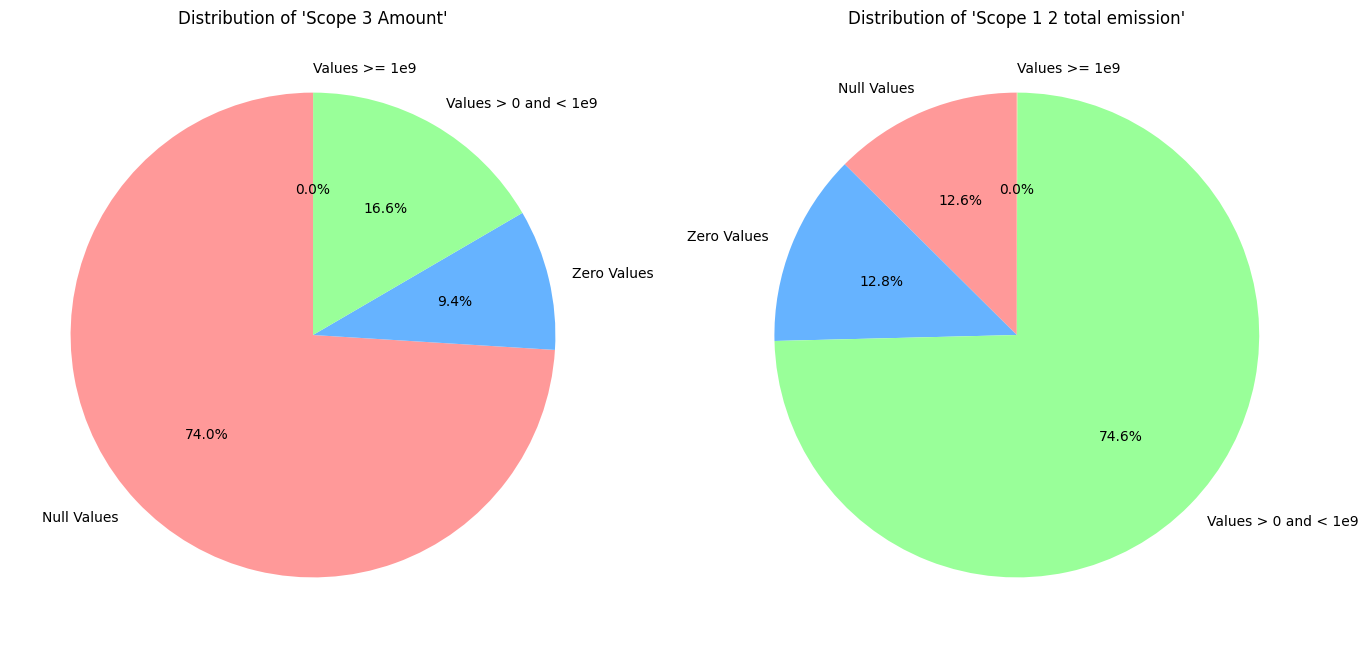

In [24]:
import matplotlib.pyplot as plt

# -------------------------------
# For "Scope 3 Amount"
# -------------------------------
col1 = 'Scope 3 Amount'
null_count1 = Scope_3_df[col1].isnull().sum()
zero_count1 = (Scope_3_df[col1] == 0).sum()
between_count1 = ((Scope_3_df[col1] > 0) & (Scope_3_df[col1] < 1e9)).sum()
above_count1 = (Scope_3_df[col1] >= 1e9).sum()

print("Distribution for 'Scope 3 Amount':")
print("  Null values:", null_count1)
print("  Zero values:", zero_count1)
print("  Values > 0 and < 1e9:", between_count1)
print("  Values >= 1e9:", above_count1)

# -------------------------------
# For "Scope 1 2 total emission"
# -------------------------------
col2 = 'Scope 1 2 total emission'
null_count2 = Scope_3_df[col2].isnull().sum()
zero_count2 = (Scope_3_df[col2] == 0).sum()
between_count2 = ((Scope_3_df[col2] > 0) & (Scope_3_df[col2] < 1e9)).sum()
above_count2 = (Scope_3_df[col2] >= 1e9).sum()

print("\nDistribution for 'Scope 1 2 total emission':")
print("  Null values:", null_count2)
print("  Zero values:", zero_count2)
print("  Values > 0 and < 1e9:", between_count2)
print("  Values >= 1e9:", above_count2)

# -------------------------------
# Create side-by-side pie charts with a common color scheme
# -------------------------------
labels = ['Null Values', 'Zero Values', 'Values > 0 and < 1e9', 'Values >= 1e9']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Common color scheme for both charts

# Data for the first pie chart
counts1 = [null_count1, zero_count1, between_count1, above_count1]

# Data for the second pie chart
counts2 = [null_count2, zero_count2, between_count2, above_count2]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(counts1, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title("Distribution of 'Scope 3 Amount'")

axes[1].pie(counts2, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title("Distribution of 'Scope 1 2 total emission'")

plt.tight_layout()
plt.show()


# Separate Scope 3 values w/ valid Scope 1&2 data

In [27]:
# DataFrame with both 'Scope 3 Amount' and 'Scope 1 2 total emission' 
# having values > 0 and < 1e9
Scope_1_2_3_values = Scope_3_df[
    (Scope_3_df['Scope 3 Amount'] > 0) & (Scope_3_df['Scope 3 Amount'] < 1e9) &
    (Scope_3_df['Scope 1 2 total emission'] > 0) & (Scope_3_df['Scope 1 2 total emission'] < 1e9)
].copy()

# DataFrame with 'Scope 3 Amount' equal to 0, while 'Scope 1 2 total emission'
# is still > 0 and < 1e9
Scope_1_2_3_zeros = Scope_3_df[
    (Scope_3_df['Scope 3 Amount'] == 0) &
    (Scope_3_df['Scope 1 2 total emission'] > 0) & (Scope_3_df['Scope 1 2 total emission'] < 1e9)
].copy()

# Print shapes for verification
print(f"Scope_1_2_3_values shape: {Scope_1_2_3_values.shape}")
print(f"Scope_1_2_3_zeros shape: {Scope_1_2_3_zeros.shape}")

# Combine both dataframes into one
Scope_1_2_3_non_nulls = pd.concat([Scope_1_2_3_values, Scope_1_2_3_zeros], axis=0, ignore_index=True)

# Print the shape of the combined DataFrame
print(f"Scope_1_2_3_non_nulls shape: {Scope_1_2_3_non_nulls.shape}")




Scope_1_2_3_values shape: (148075, 32)
Scope_1_2_3_zeros shape: (80628, 32)
Scope_1_2_3_non_nulls shape: (228703, 32)


In [29]:

cols = [
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD", "grossProfit_USD", 
    "netIncome_USD", "cashAndCashEquivalents_USD", "longTermInvestments_USD", 
    "totalAssets_USD", "totalLiabilities_USD", "totalInvestments_USD", 
    "totalDebt_USD", "totalEquity_USD", "Employee_Count", "shortTermInvestments_USD"
]

# Iterate through each specified column in Scope_3_non_nulls and print the count of null or 0 values
for col in cols:
    count = (Scope_1_2_3_non_nulls [col].isnull() | (Scope_1_2_3_non_nulls [col] == 0)).sum()
    print(f"{col}: {count} rows that are null or 0")

print("\nCounting negative values for selected columns:")

# Define only the specific columns we want to check for negative values (corporate financial terms not generally negative)
selected_cols = [
    "Revenue_USD", "Market_Cap_USD", "cashAndCashEquivalents_USD", 
    "longTermInvestments_USD", "totalAssets_USD", "totalLiabilities_USD", 
    "totalInvestments_USD", "totalDebt_USD", "Employee_Count", "shortTermInvestments_USD"
]

# Iterate through each selected column and print the count of negative values
for col in selected_cols:
    negative_count = (Scope_1_2_3_non_nulls [col] < 0).sum()
    print(f"{col}: {negative_count} rows that are negative")


Revenue_USD: 76873 rows that are null or 0
Market_Cap_USD: 82049 rows that are null or 0
ebitda_USD: 76775 rows that are null or 0
grossProfit_USD: 76933 rows that are null or 0
netIncome_USD: 76801 rows that are null or 0
cashAndCashEquivalents_USD: 76924 rows that are null or 0
longTermInvestments_USD: 87391 rows that are null or 0
totalAssets_USD: 76867 rows that are null or 0
totalLiabilities_USD: 76873 rows that are null or 0
totalInvestments_USD: 81259 rows that are null or 0
totalDebt_USD: 79309 rows that are null or 0
totalEquity_USD: 76822 rows that are null or 0
Employee_Count: 203925 rows that are null or 0
shortTermInvestments_USD: 118165 rows that are null or 0

Counting negative values for selected columns:
Revenue_USD: 50 rows that are negative
Market_Cap_USD: 0 rows that are negative
cashAndCashEquivalents_USD: 136 rows that are negative
longTermInvestments_USD: 12886 rows that are negative
totalAssets_USD: 0 rows that are negative
totalLiabilities_USD: 0 rows that are 

In [31]:
# List of all financial columns
cols_nonzero = [
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD", "grossProfit_USD", 
    "netIncome_USD", "cashAndCashEquivalents_USD", "longTermInvestments_USD", 
    "totalAssets_USD", "totalLiabilities_USD", "totalInvestments_USD", 
    "totalDebt_USD", "totalEquity_USD"
]

# For every column above, we want to drop rows where values are either null or 0.
mask_valid = True
for col in cols_nonzero:
    mask_valid &= Scope_1_2_3_non_nulls[col].notnull() & (Scope_1_2_3_non_nulls[col] != 0)

# Create an intermediate dataframe with all rows having non-null and non-zero values 
df_valid = Scope_1_2_3_non_nulls[mask_valid]

# Now, for a subset of columns we require that negative values are not allowed.
# Specifically, these columns:
cols_positive_required = [
    "Revenue_USD", "Market_Cap_USD", "cashAndCashEquivalents_USD", 
     "totalAssets_USD", "totalLiabilities_USD", "longTermInvestments_USD", 
    "totalInvestments_USD", "totalDebt_USD"
]

mask_positive = True
for col in cols_positive_required:
    mask_positive &= (df_valid[col] > 0)

# Apply the mask to filter out rows with negatives in those columns
df_final = df_valid[mask_positive]

print(f"Final dataframe shape: {df_final.shape}")

Scope_1_2_3__final = df_final[df_final['Scope 3 Amount'] != 0]

print(f"Filtered dataframe shape (non-zero 'Scope 3 Amount'): {Scope_1_2_3__final.shape}")


Final dataframe shape: (122024, 32)
Filtered dataframe shape (non-zero 'Scope 3 Amount'): (84589, 32)


# KNN Impute Financials

In [42]:
Scope_3_non_nulls_df = Scope_1_2_3__final.copy()

In [44]:
# Define the columns to check
columns_to_check = [
    'Revenue_USD', 
    'cashAndCashEquivalents_USD', 
    'longTermInvestments_USD', 
    'totalInvestments_USD'
]

# Iterate through each column and print the count of non-null, negative, and 0 values
for col in columns_to_check:
    non_null_count = Scope_3_non_nulls_df[col].notnull().sum()
    negative_count = (Scope_3_non_nulls_df[col] < 0).sum()
    zero_count = (Scope_3_non_nulls_df[col] == 0).sum()
    print(f"{col}: {non_null_count} non-null values, {negative_count} negative values, {zero_count} zero values")



Revenue_USD: 84589 non-null values, 0 negative values, 0 zero values
cashAndCashEquivalents_USD: 84589 non-null values, 0 negative values, 0 zero values
longTermInvestments_USD: 84589 non-null values, 0 negative values, 0 zero values
totalInvestments_USD: 84589 non-null values, 0 negative values, 0 zero values


# KNN Impute Financials

In [47]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder


# Define the columns used for imputation

columns_to_use = [
    'Primary activity', 'Primary sector', 'Primary industry', 'Countries',
    'Scope 1 2 total emission', 
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD", "grossProfit_USD",
    "netIncome_USD", "cashAndCashEquivalents_USD", "longTermInvestments_USD",
    "totalAssets_USD", "totalLiabilities_USD", "totalEquity_USD",
    'Scope 3 Amount',
    'totalInvestments_USD',   # Column to impute
    'totalDebt_USD'           # Column to impute
]


# Create a copy of the imputation subset from the source dataframe

impute_df = Scope_3_non_nulls_df[columns_to_use].copy()


#  Replace zeros with NaN in numeric columns so that they are imputed

# Identify the categorical columns (which should remain untouched)
categorical_cols = ["Primary activity", "Primary sector", "Primary industry", "Countries"]

# The remaining columns are numeric
numeric_cols = list(set(columns_to_use) - set(categorical_cols))
for col in numeric_cols:
    impute_df[col] = impute_df[col].replace(0, np.nan)


# Encode the categorical columns (they must be numeric for KNN imputer)

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
impute_df[categorical_cols] = encoder.fit_transform(impute_df[categorical_cols])


# Apply KNN Imputation

imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_df)
imputed_df = pd.DataFrame(imputed_array, columns=impute_df.columns, index=impute_df.index)


# Update the original dataframe with the imputed results for target columns

# Here we update only the target columns where we want imputation applied.
imputed_columns = ['totalInvestments_USD', 'totalDebt_USD']
for col in imputed_columns:
    Scope_3_non_nulls_df[col] = imputed_df[col]

# Optional — Check for any remaining nulls in the imputed columns

for col in imputed_columns:
    print(f"Nulls remaining in {col}: {Scope_3_non_nulls_df[col].isnull().sum()}")


Nulls remaining in totalInvestments_USD: 0
Nulls remaining in totalDebt_USD: 0


In [49]:
cols = [
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD", "grossProfit_USD", 
    "netIncome_USD", "cashAndCashEquivalents_USD", "longTermInvestments_USD", 
    "totalAssets_USD", "totalLiabilities_USD", "totalInvestments_USD", 
    "totalDebt_USD", "totalEquity_USD", "Employee_Count", "shortTermInvestments_USD"
]

# Iterate through each specified column in Scope_3_non_nulls_df
for col in cols:
    count_null_or_zero = (Scope_3_non_nulls_df[col].isnull() | (Scope_3_non_nulls_df[col] == 0)).sum()
    count_negative = (Scope_3_non_nulls_df[col] < 0).sum()
    print(f"{col}: {count_null_or_zero} rows that are null or 0, {count_negative} rows that are negative")


Revenue_USD: 0 rows that are null or 0, 0 rows that are negative
Market_Cap_USD: 0 rows that are null or 0, 0 rows that are negative
ebitda_USD: 0 rows that are null or 0, 2723 rows that are negative
grossProfit_USD: 0 rows that are null or 0, 597 rows that are negative
netIncome_USD: 0 rows that are null or 0, 9244 rows that are negative
cashAndCashEquivalents_USD: 0 rows that are null or 0, 0 rows that are negative
longTermInvestments_USD: 0 rows that are null or 0, 0 rows that are negative
totalAssets_USD: 0 rows that are null or 0, 0 rows that are negative
totalLiabilities_USD: 0 rows that are null or 0, 0 rows that are negative
totalInvestments_USD: 0 rows that are null or 0, 0 rows that are negative
totalDebt_USD: 0 rows that are null or 0, 0 rows that are negative
totalEquity_USD: 0 rows that are null or 0, 1231 rows that are negative
Employee_Count: 71708 rows that are null or 0, 0 rows that are negative
shortTermInvestments_USD: 19434 rows that are null or 0, 10762 rows that a

In [51]:
Scope_3_non_nulls_df.to_csv(r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Scope_3_non_nulls_df.csv', index=False)

In [53]:
Scope_3_df.to_csv(r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Full_Scope_3_df.csv', index=False)


# Fill in missing Categoricals



In [55]:
import json
import numpy as np

Scope_3_non_nulls_non_zero = Scope_3_non_nulls_df[Scope_3_non_nulls_df['Scope 3 Amount'] != 0].copy()
print(f"Number of rows after filtering: {len(Scope_3_non_nulls_non_zero)}")

Scope_3_non_nulls_non_zero['Evaluation Status'] = Scope_3_non_nulls_non_zero['Evaluation Status'].fillna('Not evaluated')

Scope_3_non_nulls_non_zero['Third_Party_Verification'] = Scope_3_non_nulls_non_zero['Third_Party_Verification'].fillna('No emissions data provided')



# Load the JSON file containing the calculation methods
json_file_path = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\calc_dict.json'
with open(json_file_path, 'r', encoding='utf-8-sig') as f:
    calc_dict_str = json.load(f)

# Define a lookup function that builds the key from 'Year of Data' and 'Account Numbers'
def lookup_calc_method(row):
    key = f"{row['Year of Data']}_{row['Account Numbers']}"
    return calc_dict_str.get(key, np.nan)

# Apply the lookup function to each row of new_df to create the new column
Scope_3_non_nulls_non_zero['Calculation_Method_modeled'] = Scope_3_non_nulls_non_zero.apply(lookup_calc_method, axis=1)


Scope_3_non_nulls_non_zero['Calculation_Method_modeled'] = Scope_3_non_nulls_non_zero['Calculation_Method_modeled'].fillna('Calculation Undetermined')

Scope_3_non_nulls_non_zero.rename(
    columns={"Perc emissions calculated w primary data ": "Perc emissions calculated w primary data"},
    inplace=True
)

Scope_3_non_nulls_non_zero["Perc emissions calculated w primary data"] = Scope_3_non_nulls_non_zero["Perc emissions calculated w primary data"].fillna(0.0)

cols_to_drop = ['Explanation', 'Calculation Methodology', 'Employee_Count',	'Reported_Currency', 'shortTermInvestments_USD']

Scope_3_non_nulls_non_zero = Scope_3_non_nulls_non_zero.drop(columns=cols_to_drop)

Number of rows after filtering: 84589


# Log Transform Features


In [57]:
# List of feature columns to check
cols_to_check = [
    'Scope 1 2 total emission', 'Revenue_USD', 'Market_Cap_USD',
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD',
    'cashAndCashEquivalents_USD', 'longTermInvestments_USD',
    'totalAssets_USD', 'totalLiabilities_USD', 'totalInvestments_USD',
    'totalDebt_USD', 'totalEquity_USD'
]

# Iterate through each column and count
for col in cols_to_check:
    num_lt_0 = (Scope_3_non_nulls_non_zero[col] < 0).sum()
    num_eq_0 = (Scope_3_non_nulls_non_zero[col] == 0).sum()
    print(f"{col}: < 0 = {num_lt_0}, == 0 = {num_eq_0}")


Scope 1 2 total emission: < 0 = 0, == 0 = 0
Revenue_USD: < 0 = 0, == 0 = 0
Market_Cap_USD: < 0 = 0, == 0 = 0
ebitda_USD: < 0 = 2723, == 0 = 0
grossProfit_USD: < 0 = 597, == 0 = 0
netIncome_USD: < 0 = 9244, == 0 = 0
cashAndCashEquivalents_USD: < 0 = 0, == 0 = 0
longTermInvestments_USD: < 0 = 0, == 0 = 0
totalAssets_USD: < 0 = 0, == 0 = 0
totalLiabilities_USD: < 0 = 0, == 0 = 0
totalInvestments_USD: < 0 = 0, == 0 = 0
totalDebt_USD: < 0 = 0, == 0 = 0
totalEquity_USD: < 0 = 1231, == 0 = 0


In [61]:
import numpy as np

# Define the signed log function
def signed_log(x):
    return np.sign(x) * np.log1p(np.abs(x))

# Define which columns need signed log (can have negative values)
cols_signed_log = [
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'totalEquity_USD'
]

# Define which columns should be standard log1p (should be non-negative)
cols_normal_log = [
    'Scope 1 2 total emission', 'Revenue_USD', 'Market_Cap_USD',
    'cashAndCashEquivalents_USD', 'longTermInvestments_USD',
    'totalAssets_USD', 'totalLiabilities_USD', 'totalInvestments_USD',
    'totalDebt_USD'
]

# Apply signed log transformation
for col in cols_signed_log:
    Scope_3_non_nulls_non_zero[f'log_{col}'] = signed_log(Scope_3_non_nulls_non_zero[col])

# Apply standard log1p transformation with safety check
for col in cols_normal_log:
    new_col = f'log_{col}'
    Scope_3_non_nulls_non_zero[new_col] = np.nan  # initialize
    valid_mask = Scope_3_non_nulls_non_zero[col].notnull() & (Scope_3_non_nulls_non_zero[col] >= 0)
    Scope_3_non_nulls_non_zero.loc[valid_mask, new_col] = np.log1p(Scope_3_non_nulls_non_zero.loc[valid_mask, col])



In [63]:
Scope_3_non_nulls_non_zero.head()

,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Perc emissions calculated w primary data,Scope 1 2 total emission,Third_Party_Verification,Revenue_USD,Market_Cap_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Calculation_Method_modeled,log_ebitda_USD,log_grossProfit_USD,log_netIncome_USD,log_totalEquity_USD,log_Scope 1 2 total emission,log_Revenue_USD,log_Market_Cap_USD,log_cashAndCashEquivalents_USD,log_longTermInvestments_USD,log_totalAssets_USD,log_totalLiabilities_USD,log_totalInvestments_USD,log_totalDebt_USD
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,6,Business travel,"Relevant, calculated",56.78,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587
6,2013,Commercial services,Commercial & consumer services,Services,58,USA,ABM INDUSTRIES INC,ABM US,6,Business travel,"Relevant, calculated",1706.23,0.0,5.818828e+04,No third party verification or assurance,4.809281e+09,1.592463e+09,1.538970e+08,4.958520e+08,7.290000e+07,3.263900e+07,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08,Calculation Undetermined,18.851794,20.021788,18.104599,20.637171,10.971456,22.293813,21.188548,17.301018,17.397667,21.474321,20.907027,17.397667,19.567670
7,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,1,Purchased goods and services,"Relevant, calculated",5802000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409
8,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,2,Capital goods,"Relevant, calculated",504000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409


# Windsorize Scope 3 Amounts

In [66]:
import numpy as np
import pandas as pd

def windsorize_column(df, column_name, lower_pct=0.01, upper_pct=0.99):
    """
    Windsorizes the given column in the DataFrame by capping values at specified percentiles.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column_name (str): Column to windsorize
    - lower_pct (float): Lower percentile (0.01 = 1st percentile)
    - upper_pct (float): Upper percentile (0.99 = 99th percentile)
    
    Returns:
    - pd.Series: Windsorized column as a Series
    """
    lower_bound = df[column_name].quantile(lower_pct)
    upper_bound = df[column_name].quantile(upper_pct)
    
    return df[column_name].clip(lower=lower_bound, upper=upper_bound)


# Apply windsorization to 'Scope 3 Amount'
Scope_3_non_nulls_non_zero['Scope_3_windsorized'] = windsorize_column(
    Scope_3_non_nulls_non_zero, 
    'Scope 3 Amount', 
    lower_pct=0.01, 
    upper_pct=0.99
)


Scope_3_non_nulls_non_zero.head()

,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Perc emissions calculated w primary data,Scope 1 2 total emission,Third_Party_Verification,Revenue_USD,Market_Cap_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Calculation_Method_modeled,log_ebitda_USD,log_grossProfit_USD,log_netIncome_USD,log_totalEquity_USD,log_Scope 1 2 total emission,log_Revenue_USD,log_Market_Cap_USD,log_cashAndCashEquivalents_USD,log_longTermInvestments_USD,log_totalAssets_USD,log_totalLiabilities_USD,log_totalInvestments_USD,log_totalDebt_USD,Scope_3_windsorized
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,12.34
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,6,Business travel,"Relevant, calculated",56.78,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,56.78
6,2013,Commercial services,Commercial & consumer services,Services,58,USA,ABM INDUSTRIES INC,ABM US,6,Business travel,"Relevant, calculated",1706.23,0.0,5.818828e+04,No third party verification or assurance,4.809281e+09,1.592463e+09,1.538970e+08,4.958520e+08,7.290000e+07,3.263900e+07,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08,Calculation Undetermined,18.851794,20.021788,18.104599,20.637171,10.971456,22.293813,21.188548,17.301018,17.397667,21.474321,20.907027,17.397667,19.567670,1706.23
7,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,1,Purchased goods and services,"Relevant, calculated",5802000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,5802000.00
8,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,2,Capital goods,"Relevant, calculated",504000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,504000.00


In [81]:
import pandas as pd

# 1. specify the features
cols = [
    'log_totalAssets_USD', 'log_Market_Cap_USD', 'log_cashAndCashEquivalents_USD',
    'log_longTermInvestments_USD', 'log_totalLiabilities_USD', 'log_totalInvestments_USD',
    'log_totalDebt_USD', 'log_ebitda_USD', 'log_grossProfit_USD', 'log_netIncome_USD',
    'log_Revenue_USD', 'log_Scope 1 2 total emission'
]

# 2. compute the stats and reshape
summary = (
    Scope_3_non_nulls_non_zero[cols]
    .agg(['count','mean','median','std'])
    .T
    .reset_index()
)
summary.columns = ['Feature','Observations','Mean','Median','Std']

# 3. round the floats and cast counts
summary[['Mean','Median','Std']] = summary[['Mean','Median','Std']].round(2)
summary['Observations'] = summary['Observations'].astype(int)

# 4. map each feature to its category
category_map = {
    **{c: 'Stock variables' for c in [
        'log_totalAssets_USD','log_Market_Cap_USD','log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD','log_totalLiabilities_USD',
        'log_totalInvestments_USD','log_totalDebt_USD'
    ]},
    **{c: 'Flow variables' for c in [
        'log_ebitda_USD','log_grossProfit_USD','log_netIncome_USD','log_Revenue_USD'
    ]},
    'log_Scope 1 2 total emission': 'Emissions metrics'
}
summary['Category'] = summary['Feature'].map(category_map)

# 5. make Category an ordered categorical and sort
order = ['Stock variables','Flow variables','Emissions metrics']
cat_type = pd.CategoricalDtype(categories=order, ordered=True)
summary['Category'] = summary['Category'].astype(cat_type)

summary = (
    summary
    .sort_values(['Category','Feature'])
    .reset_index(drop=True)
    [['Category','Feature','Observations','Mean','Median','Std']]
)

summary


,Category,Feature,Observations,Mean,Median,Std
0,Stock variables,log_Market_Cap_USD,84589,22.62,22.63,1.74
1,Stock variables,log_cashAndCashEquivalents_USD,84589,20.52,20.51,1.85
2,Stock variables,log_longTermInvestments_USD,84589,19.88,19.89,2.73
3,Stock variables,log_totalAssets_USD,84589,23.20,23.14,1.74
4,Stock variables,log_totalDebt_USD,84589,21.51,21.73,2.09
5,Stock variables,log_totalInvestments_USD,84589,20.02,20.05,2.76
6,Stock variables,log_totalLiabilities_USD,84589,22.60,22.54,1.91
7,Flow variables,log_Revenue_USD,84589,22.50,22.57,1.50
8,Flow variables,log_ebitda_USD,84589,19.40,20.65,7.19
9,Flow variables,log_grossProfit_USD,84589,21.10,21.35,3.78


In [95]:
import pandas as pd

df2 = summary

df1 = pd.DataFrame({
    'Category': [
        'Stock Variables','Stock Variables','Stock Variables','Stock Variables','Stock Variables',
        'Flow Variables','Flow Variables','Flow Variables','Flow Variables','Flow Variables',
        'Flow Variables','Emissions Metrics','Emissions Metrics'
    ],
    'Feature': [
        'logTotalAssets','logNetPropertyPlantAndEquipment','logCommonEquity','logMarketCapitalization','logNumberOfEmployees',
        'logSales','logCostOfGoodsSold','logSellingGeneralAdministrativeExpenses','logOperatingExpense','logOperatingIncome',
        'logCapitalExpenditures','logScope1','logScope2'
    ],
    'Observations': [9013]*13,
    'Mean':       [22.88,21.38,21.88,22.64,9.58,22.48,21.73,20.68,22.33,19.42,19.45,11.64,11.70],
    'Median':     [22.84,21.47,21.88,22.65,9.67,22.49,21.90,20.71,22.36,20.09,19.54,11.54,11.91],
    'Std':        [1.41,1.87,1.41,1.49,1.64,1.48,2.19,1.64,1.51,4.00,2.06,2.96,2.16]
})

df1


,Category,Feature,Observations,Mean,Median,Std
0,Stock Variables,logTotalAssets,9013,22.88,22.84,1.41
1,Stock Variables,logNetPropertyPlantAndEquipment,9013,21.38,21.47,1.87
2,Stock Variables,logCommonEquity,9013,21.88,21.88,1.41
3,Stock Variables,logMarketCapitalization,9013,22.64,22.65,1.49
4,Stock Variables,logNumberOfEmployees,9013,9.58,9.67,1.64
5,Flow Variables,logSales,9013,22.48,22.49,1.48
6,Flow Variables,logCostOfGoodsSold,9013,21.73,21.90,2.19
7,Flow Variables,logSellingGeneralAdministrativeExpenses,9013,20.68,20.71,1.64
8,Flow Variables,logOperatingExpense,9013,22.33,22.36,1.51
9,Flow Variables,logOperatingIncome,9013,19.42,20.09,4.00


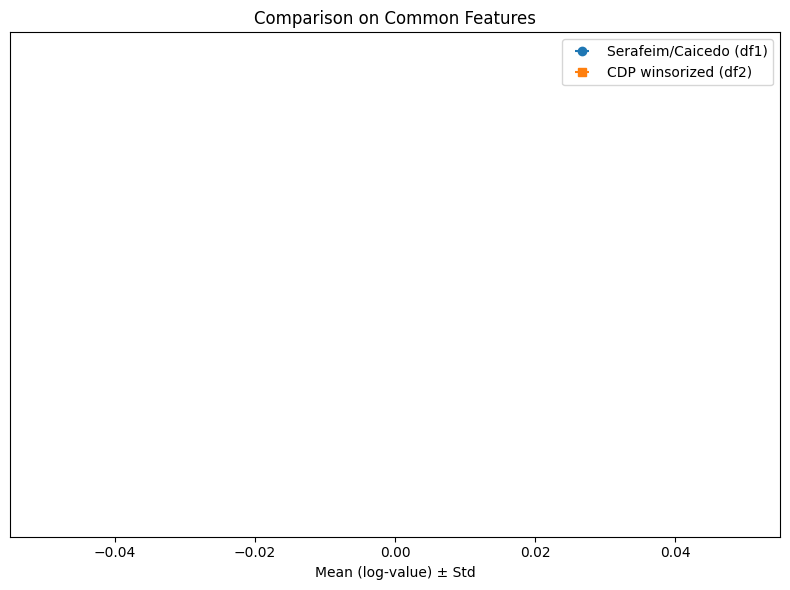

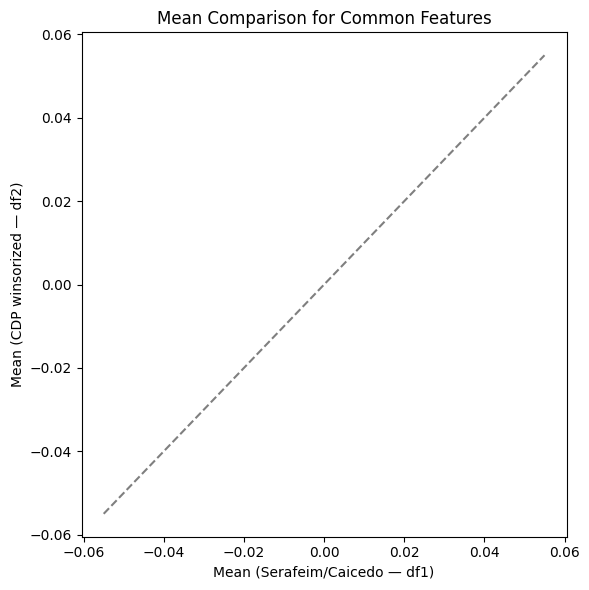

In [105]:
import matplotlib.pyplot as plt
import numpy as np

def compare_common_features(df1, df2):
    # 1. find the intersection of features
    common = list(set(df1['Feature']).intersection(df2['Feature']))
    
    # 2. filter each DF down to just those common features
    s1 = df1[df1['Feature'].isin(common)].copy()
    s2 = df2[df2['Feature'].isin(common)].copy()
    
    # 3. re‑order rows so both follow the same feature order
    s1 = s1.set_index('Feature').loc[common].reset_index()
    s2 = s2.set_index('Feature').loc[common].reset_index()
    
    # 4. prepare y positions
    y = np.arange(len(common))
    
    # 5. plot Means ± Std
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.errorbar(
        s1['Mean'], y, xerr=s1['Std'],
        fmt='o', label='Serafeim/Caicedo (df1)', capsize=3
    )
    ax.errorbar(
        s2['Mean'], y, xerr=s2['Std'],
        fmt='s', label='CDP winsorized (df2)', capsize=3
    )
    
    ax.set_yticks(y)
    ax.set_yticklabels(common)
    ax.invert_yaxis()  # first feature at top
    ax.set_xlabel('Mean (log‑value) ± Std')
    ax.set_title('Comparison on Common Features')
    ax.legend()
    plt.tight_layout()
    plt.show()


def scatter_compare(df1, df2):
    # merge on Feature to get one row per common feature
    merged = (
        df1[['Feature','Mean']]
        .merge(df2[['Feature','Mean']], on='Feature', suffixes=('_df1','_df2'))
    )
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(merged['Mean_df1'], merged['Mean_df2'])
    # 45° reference line
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5)
    
    ax.set_xlabel('Mean (Serafeim/Caicedo — df1)')
    ax.set_ylabel('Mean (CDP winsorized — df2)')
    ax.set_title('Mean Comparison for Common Features')
    plt.tight_layout()
    plt.show()


# Usage:
compare_common_features(df1, df2)
scatter_compare(df1, df2)


In [101]:
import matplotlib.pyplot as plt
import numpy as np

def compare_common_features(summary_serafeim, summary_cliff):
    # 1. find the intersection of features
    common = list(
        set(summary_serafeim['Feature'])
        .intersection(summary_cliff['Feature'])
    )
    
    # 2. filter each DF
    s1 = summary_serafeim[summary_serafeim['Feature'].isin(common)].copy()
    s2 = summary_cliff[summary_cliff['Feature'].isin(common)].copy()
    
    # 3. re‑order to match the same feature order (here we use the order in s1)
    s1 = s1.set_index('Feature').loc[common].reset_index()
    s2 = s2.set_index('Feature').loc[common].reset_index()
    
    # 4. prepare y positions
    y = np.arange(len(common))
    
    # 5. plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.errorbar(
        s1['Mean'], y,
        xerr=s1['Std'], fmt='o',
        label='Serafeim/Caicedo', capsize=3
    )
    ax.errorbar(
        s2['Mean'], y,
        xerr=s2['Std'], fmt='s',
        label='CDP winsorized', capsize=3
    )
    
    # formatting
    ax.set_yticks(y)
    ax.set_yticklabels(common)
    ax.invert_yaxis()
    ax.set_xlabel('Mean (log‑value) ± Std')
    ax.set_title('Comparison on Common Features')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
# compare_common_features(summary_serafeim, summary_cliff)


# Log Transform Scope 3 Amounts

In [71]:
# Define which columns should be standard log1p (should be non-negative)
cols_normal_log = [
    'Scope 3 Amount'
]



# Apply standard log1p transformation with safety check
for col in cols_normal_log:
    new_col = f'log_{col}'
    Scope_3_non_nulls_non_zero_winds_logged[new_col] = np.nan  # initialize
    valid_mask = Scope_3_non_nulls_non_zero_winds_logged[col].notnull() & (Scope_3_non_nulls_non_zero_winds_logged[col] >= 0)
    Scope_3_non_nulls_non_zero_winds_logged.loc[valid_mask, new_col] = np.log1p(Scope_3_non_nulls_non_zero_winds_logged.loc[valid_mask, col])

NameError: name 'Scope_3_non_nulls_non_zero_winds_logged' is not defined

In [ ]:
Scope_3_non_nulls_non_zero_winds_logged.head()

In [ ]:


Scope_3_non_nulls_non_zero_winds_logged.to_csv(r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Scope_3_non_nulls_non_zero_winds_logged.csv', index=False)

# Understanding the Count of Rows with Valid (Non-Null, Non-Zero) Values

From our previous analysis, we observed that the 'Employee_Count' column contains only approximately 66,000 valid entries—as confirmed by data retrieved from the financial data API. This limited number of non-null, non-zero values highlights potential gaps in the available data.

In [ ]:
import pandas as pd
import numpy as np

# ---------------------------
# Process 'Scope 1 2 total emission'
# ---------------------------
# Convert the column to numeric (coerce errors to NaN)
emission_numeric = pd.to_numeric(Scope_3_df['Scope 1 2 total emission'], errors='coerce')

# Filter out null and zero values
filtered_emissions = emission_numeric[(emission_numeric != 0) & (emission_numeric.notnull())]

# Count non-zero and non-null observations
observations = filtered_emissions.count()

# Compute the natural log of the filtered values
log_values = np.log(filtered_emissions)

# Calculate mean, median, and standard deviation of the log values
mean_log = log_values.mean()
median_log = log_values.median()
std_log = log_values.std()

# Create a DataFrame row for 'Scope 1 2 total emission'
result_df = pd.DataFrame({
    'Feature': ['Scope 1 2 total emission'],
    'Observations': [observations],
    'Mean': [mean_log],
    'Median': [median_log],
    'Standard Deviation': [std_log]
})

# ---------------------------
# Process 'Employee_Count'
# ---------------------------
# Convert the 'Employee_Count' column to numeric (coerce errors to NaN)
employee_numeric = pd.to_numeric(Scope_3_df['Employee_Count'], errors='coerce')

# Filter out null and zero values
filtered_employee = employee_numeric[(employee_numeric != 0) & (employee_numeric.notnull())]

# Count non-zero and non-null observations
observations_employee = filtered_employee.count()

# Compute the natural log of the filtered values
log_employee = np.log(filtered_employee)

# Calculate mean, median, and standard deviation of the log values
mean_employee = log_employee.mean()
median_employee = log_employee.median()
std_employee = log_employee.std()

# Create a DataFrame row for 'Employee_Count'
employee_row = pd.DataFrame({
    'Feature': ['Employee_Count'],
    'Observations': [observations_employee],
    'Mean': [mean_employee],
    'Median': [median_employee],
    'Standard Deviation': [std_employee]
})

# Append the new row to the result DataFrame
result_df = pd.concat([result_df, employee_row], ignore_index=True)

# Add 'log(' to the beginning and ')' at the end of each feature name
result_df['Feature'] = result_df['Feature'].apply(lambda x: f'log({x})')

result_df.head()


In [ ]:
# Understanding Gaps in Financial Data



In [ ]:
import pandas as pd
import numpy as np

# Define the list of columns to check
cols = [
    'Scope 1 2 total emission', 'Revenue_USD', 'Market_Cap_USD', 
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
    'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
    'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD'
]

# Create a dictionary to store non-null and non-zero counts for each column
counts = {}

for col in cols:
    # Convert the column to numeric (coerce errors to NaN)
    numeric_col = pd.to_numeric(Scope_3_df[col], errors='coerce')
    # Filter out rows where the value is 0 or null
    non_zero_non_null = numeric_col[(numeric_col != 0) & (numeric_col.notnull())]
    counts[col] = non_zero_non_null.count()

print("Non-null and non-zero counts per column:")
for key, value in counts.items():
    print(f"{key}: {value}")

# Create a boolean mask that is True for rows where all columns are non-null and non-zero
mask = np.ones(len(Scope_3_df), dtype=bool)

for col in cols:
    numeric_col = pd.to_numeric(Scope_3_df[col], errors='coerce')
    mask &= (numeric_col != 0) & (numeric_col.notnull())

# Count the number of rows where the mask is True
common_rows_count = mask.sum()

print("\nTotal number of rows with non-null and non-zero values for all columns:")
print(common_rows_count)


# Charting Common Scope 1 & 2 data with full financial data

In [ ]:
Scope_3_non_nulls.columns


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# -------------------------------
# Step 1: Define the columns used for imputation
# -------------------------------
columns_to_use = [
    'Primary activity', 'Primary sector', 'Primary industry', 'Countries',
    'Scope 1 2 total emission', 
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD", "grossProfit_USD",
    "netIncome_USD", "cashAndCashEquivalents_USD", "longTermInvestments_USD",
    "totalAssets_USD", "totalLiabilities_USD", "totalEquity_USD",
    'Scope 3 Amount',
    'totalInvestments_USD',   # Column to impute
    'totalDebt_USD'           # Column to impute
]

# -------------------------------
# Step 2: Create a copy of the imputation subset from the source dataframe
# -------------------------------
impute_df = Scope_3_non_nulls[columns_to_use].copy()

# -------------------------------
# Step 3: Replace zeros with NaN in numeric columns so that they are imputed
# -------------------------------
# Identify the categorical columns (which should remain untouched)
categorical_cols = ["Primary activity", "Primary sector", "Primary industry", "Countries"]

# The remaining columns are numeric
numeric_cols = list(set(columns_to_use) - set(categorical_cols))
for col in numeric_cols:
    impute_df[col] = impute_df[col].replace(0, np.nan)

# -------------------------------
# Step 4: Encode the categorical columns (they must be numeric for KNN imputer)
# -------------------------------
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
impute_df[categorical_cols] = encoder.fit_transform(impute_df[categorical_cols])

# -------------------------------
# Step 5: Apply KNN Imputation
# -------------------------------
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_df)
imputed_df = pd.DataFrame(imputed_array, columns=impute_df.columns, index=impute_df.index)

# -------------------------------
# Step 6: Update the original dataframe with the imputed results for target columns
# -------------------------------
# Here we update only the target columns where we want imputation applied.
imputed_columns = ['totalInvestments_USD', 'totalDebt_USD']
for col in imputed_columns:
    Scope_3_non_nulls[col] = imputed_df[col]

# -------------------------------
# Step 7: Optional — Check for any remaining nulls in the imputed columns
# -------------------------------
for col in imputed_columns:
    print(f"Nulls remaining in {col}: {Scope_3_non_nulls[col].isnull().sum()}")


In [ ]:
import pandas as pd
import numpy as np

# Define the list of columns to check
cols = [
    'Scope 1 2 total emission', 'Revenue_USD', 'Market_Cap_USD', 
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
    'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
    'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD'
]

# Create a dictionary to store non-null and non-zero counts for each column in Scope_3_non_nulls
counts = {}

for col in cols:
    # Convert the column to numeric (coerce errors to NaN)
    numeric_col = pd.to_numeric(Scope_3_non_nulls[col], errors='coerce')
    # Filter out rows where the value is 0 or null
    non_zero_non_null = numeric_col[(numeric_col != 0) & (numeric_col.notnull())]
    counts[col] = non_zero_non_null.count()

print("Non-null and non-zero counts per column:")
for key, value in counts.items():
    print(f"{key}: {value}")

# Create a boolean mask that is True for rows where all columns are non-null and non-zero
mask = np.ones(len(Scope_3_non_nulls), dtype=bool)
for col in cols:
    numeric_col = pd.to_numeric(Scope_3_non_nulls[col], errors='coerce')
    mask &= (numeric_col != 0) & (numeric_col.notnull())

# Count the number of rows where the mask is True
common_rows_count = mask.sum()

print("\nTotal number of rows with non-null and non-zero values for all columns:")
print(common_rows_count)


# Plotting Scope 1 & 2 Emissions with Financial Data distributions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the list of columns (excluding Employee_Count)
cols = [
    'Scope 1 2 total emission', 'Revenue_USD', 'Market_Cap_USD', 
    'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
    'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
    'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD'
]

# Ensure these columns are numeric (converting errors to NaN)
for col in cols:
    Scope_3_df[col] = pd.to_numeric(Scope_3_df[col], errors='coerce')

# Build a boolean mask for rows where every column in 'cols' has non-null and non-zero values.
mask = np.ones(len(Scope_3_df), dtype=bool)
for col in cols:
    mask &= (Scope_3_df[col] != 0) & (Scope_3_df[col].notnull())

# Filter the DataFrame to only include rows that meet the condition across all columns.
common_df = Scope_3_df[mask].copy()

# For each column in cols, add a new column containing the log-transformed values.
# Use a lambda function to compute log only for positive values.
for col in cols:
    new_col = f'log({col})'
    common_df[new_col] = common_df[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Create a grid for the histograms. We will plot the newly created log columns.
n = len(cols)
ncols = 3  # Number of histograms per row (adjust as needed)
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()  # Flatten so we can iterate easily

# Plot a histogram for each new log-transformed column.
for i, col in enumerate(cols):
    new_col = f'log({col})'
    log_values = common_df[new_col]
    
    axes[i].hist(log_values, bins=30, edgecolor='black')
    axes[i].set_title(new_col)
    axes[i].set_xlabel('Log Value')
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots.
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



# Filter and windsorize Scope 1 & 2 emissions and financial data

# rechart windsorized rows with Scope 1 & 2 data with financial data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math



# Ensure these columns are numeric (converting errors to NaN)
for col in cols:
    scope_3_filtered_windsorized[col] = pd.to_numeric(scope_3_filtered_windsorized[col], errors='coerce')

# Build a boolean mask that is True for rows where every column in 'cols'
# has a non-null and non-zero value.
mask = np.ones(len(scope_3_filtered_windsorized), dtype=bool)
for col in cols:
    mask &= (scope_3_filtered_windsorized[col] != 0) & (scope_3_filtered_windsorized[col].notnull())

# Filter the DataFrame to only include rows that meet the condition across all columns.
common_df = scope_3_filtered_windsorized[mask].copy()

# Create a grid for the histograms
n = len(cols)
ncols = 3  # Number of histograms per row (adjust as needed)
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()  # Flatten to easily iterate over axes

# We'll accumulate the local counts for a global total.
global_total = 0

# Plot a histogram for the log-transformed values of each column
for i, col in enumerate(cols):
    # Compute the natural log of the column values (assuming all values are positive)
    log_values = np.log(common_df[col])
    
    # Plot the histogram of log-transformed values
    axes[i].hist(log_values, bins=30, edgecolor='black')
    axes[i].set_title(f'log({col})')
    axes[i].set_xlabel('Log Value')
    axes[i].set_ylabel('Frequency')
    
    # Compute the number of data points used for this histogram.
    local_count = len(log_values)
    global_total += local_count
    
    # Annotate the subplot with the count of values for this histogram.
    axes[i].text(0.95, 0.95, f"N = {local_count}", transform=axes[i].transAxes,
                 horizontalalignment='right', verticalalignment='top', fontsize=8, color='blue')

# Turn off any unused subplots in the grid.
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Add a global text at the bottom of the figure showing the total number of data points across all histograms.
plt.figtext(0.5, 0.01, f"Total N across all histograms = {global_total}", ha="center", fontsize=12, color="red")

plt.tight_layout()
plt.show()


# Filtered and windsorized data with Scope 3 Emissions

In [ ]:
# Create a mask for non-null values in 'Scope 3 Amount' (do not filter out zeros)
mask = common_df['Scope 3 Amount'].notnull()

# Count total rows that meet the non-null criteria
non_null_count = common_df[mask]['Scope 3 Amount'].count()
print("Number of non-null rows in 'Scope 3 Amount':", non_null_count)

# Group the filtered rows by 'Scope 3 Sources' and count the number of rows per unique value
source_counts = common_df[mask].groupby('Scope 3 Sources')['Scope 3 Amount'].count()
print("\nCounts of non-null rows in 'Scope 3 Amount' by 'Scope 3 Sources':")
print(source_counts)

common_df.head()




In [ ]:
import pandas as pd
import numpy as np

grouped_scope3 = common_df.groupby('Scope 3 Sources').agg(
    total_count=('Scope 3 Amount', 'size'),
    non_null_count=('Scope 3 Amount', 'count'),
    # Compute statistics on the natural log of Scope 3 Amount (only for positive values)
    mean_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')[pd.to_numeric(x, errors='coerce') > 0]).mean()),
    median_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')[pd.to_numeric(x, errors='coerce') > 0]).median()),
    std_amount=('Scope 3 Amount', lambda x: np.log(pd.to_numeric(x, errors='coerce')[pd.to_numeric(x, errors='coerce') > 0]).std()),
    n_zeros=('Scope 3 Amount', lambda x: (pd.to_numeric(x, errors='coerce') == 0).sum()),
    over80_count=('Perc emissions calculated w primary data ', 
                  lambda x: (pd.to_numeric(x, errors='coerce') >= 80).sum()),
    perc_over_80=('Perc emissions calculated w primary data ', 
                  lambda x: (pd.to_numeric(x, errors='coerce') >= 80).sum() / len(x) * 100)
)

# Calculate the percentage of non-missing observations for each group
grouped_scope3['non_null_percentage'] = (grouped_scope3['non_null_count'] / grouped_scope3['total_count'] * 100).round(1)

# Round the percentage of reported with primary data >=80 column to one decimal place
grouped_scope3['perc_over_80'] = grouped_scope3['perc_over_80'].round(1)

# Rename columns as requested:
#   - non_null_count -> 'Non-missing Observations'
#   - non_null_percentage -> 'Pct of Observations Non-missing'
#   - over80_count -> 'Count of reported with Primary Data =>80'
#   - perc_over_80 -> 'Pct of reported with Primary Data =>80%'
#   - n_zeros -> 'N Zeros'
#   - mean_amount -> 'Mean'
#   - median_amount -> 'Median'
#   - std_amount -> 'Standard Deviation'
grouped_scope3.rename(columns={
    'non_null_count': 'Non-missing Observations',
    'non_null_percentage': 'Pct of Observations Non-missing',
    'over80_count': 'Count of reported with Primary Data =>80',
    'perc_over_80': 'Pct of reported with Primary Data =>80%',
    'n_zeros': 'N Zeros',
    'mean_amount': 'Mean',
    'median_amount': 'Median',
    'std_amount': 'Standard Deviation'
}, inplace=True)

# Add new column: Percent of reported as Zero, calculated as zeros divided by non-missing observations
grouped_scope3['Pct of reported as Zero'] = (grouped_scope3['N Zeros'] / grouped_scope3['Non-missing Observations'] * 100).round(1)

# Drop the total_count column as it's only used for intermediate calculations
grouped_scope3 = grouped_scope3.drop(columns='total_count')

# Reorder columns as desired:
# Order: Non-missing Observations, Pct of Observations Non-missing, 
#        Count of reported with Primary Data =>80, Pct of reported with Primary Data =>80%,
#        N Zeros, Pct of reported as Zero, Mean, Median, Standard Deviation
grouped_scope3 = grouped_scope3[['Non-missing Observations',
                                 'Pct of Observations Non-missing',
                                 'Count of reported with Primary Data =>80',
                                 'Pct of reported with Primary Data =>80%',
                                 'N Zeros',
                                 'Pct of reported as Zero',
                                 'Mean',
                                 'Median',
                                 'Standard Deviation']]


grouped_scope3.head(20)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Step 1: Copy the Filtered DataFrame ---
# Assume common_df is already created from Scope_3_df using your previous filtering.
df_copy = common_df.copy()  # This ensures we don't modify the original DataFrame

# --- Step 2: Create a New Column with Winsorized and Logged 'Scope 3 Amount' ---
def win_log(series):
    # Compute the lower and upper bounds (1st and 99.9th percentiles)
    lower_bound = series.quantile(0.01)
    upper_bound = series.quantile(0.99)
    # Winsorize: clip values below lower_bound and above upper_bound
    winsorized = series.clip(lower=lower_bound, upper=upper_bound)
    # Compute the natural log only for positive values, else return NaN.
    return winsorized.apply(lambda x: np.log(x) if x > 0 else np.nan)

# Apply the winsorization and log transformation group-wise and save in a new column.
df_copy['log_winsorized_Scope 3 Amount'] = df_copy.groupby('Scope 3 Sources')['Scope 3 Amount'].transform(win_log)

# --- Step 3: Group and Plot Using the New Column ---
groups = df_copy.groupby('Scope 3 Sources')

# Determine the number of groups and set up a grid layout for subplots.
n_groups = len(groups)
ncols = 4  # Adjust as needed
nrows = math.ceil(n_groups / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()  # Flatten to iterate easily

global_total = 0  # To accumulate the total count of data points

# Loop over each group and plot a histogram of the new log-transformed column.
for i, (source, group_df) in enumerate(groups):
    log_values = group_df['log_winsorized_Scope 3 Amount']
    
    axes[i].hist(log_values, bins=30, edgecolor='black')
    axes[i].set_title(source, fontsize=10)
    axes[i].set_xlabel('Log(Scope 3 Amount)', fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    
    # Count non-NaN data points for this group.
    total_points = log_values.dropna().shape[0]
    global_total += total_points
    
    # Annotate the subplot with its local count.
    axes[i].text(0.95, 0.95, f"N = {total_points}", transform=axes[i].transAxes,
                 horizontalalignment='right', verticalalignment='top', fontsize=8, color='blue')

# Turn off any unused subplots.
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Add global count text at the bottom of the figure.
plt.figtext(0.5, 0.01, f"Total N across all groups = {global_total}", ha="center", fontsize=12, color="red")

plt.tight_layout()
plt.show()

# Group the dataframe by 'Scope 3 Sources'
for source, group_df in df_copy.groupby('Scope 3 Sources'):
    # Count rows in the current group where 'log_winsorized_Scope 3 Amount' is <= 0
    count_le_zero = (group_df['log_winsorized_Scope 3 Amount'] <= 0).sum()
    print(f"{source}: {count_le_zero} rows <= 0")


In [ ]:
df_nonnull_prep = df_nonnull.copy()

df_nonnull_prep = 

In [ ]:
non_null_counts = df_copy.notnull().sum()
print(non_null_counts)


In [ ]:
# Copy df_copy to a new DataFrame
new_df = df_copy.copy()

# Drop all rows where 'log_winsorized_Scope 3 Amount' is null
new_df = new_df[new_df['log_winsorized_Scope 3 Amount'].notnull()]

# Define the list of columns to keep
keep_cols = [
    'Year of Data', 'Primary activity', 'Primary sector', 'Primary industry', 
    'Account Numbers', 'Countries', 'Scope 3 Sources', 'Evaluation Status',  
    'Calculation Methodology', 'Perc emissions calculated w primary data ', 
    'Third_Party_Verification', 
    'log_winsorized_Scope 1 2 total emission', 'log_winsorized_Revenue_USD', 
    'log_winsorized_Market_Cap_USD', 'log_winsorized_ebitda_USD', 
    'log_winsorized_grossProfit_USD', 'log_winsorized_netIncome_USD', 
    'log_winsorized_cashAndCashEquivalents_USD', 'log_winsorized_longTermInvestments_USD', 
    'log_winsorized_totalAssets_USD', 'log_winsorized_totalLiabilities_USD', 
    'log_winsorized_totalInvestments_USD', 'log_winsorized_totalDebt_USD', 
    'log_winsorized_totalEquity_USD', 'log_winsorized_Scope 3 Amount'
]

# Keep only the specified columns in the new DataFrame
new_df = new_df[keep_cols]

# Print the shape of the new DataFrame
print(new_df.shape)

import json
import numpy as np

# Load the JSON file containing the calculation methods
json_file_path = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\calc_dict.json'
with open(json_file_path, 'r', encoding='utf-8-sig') as f:
    calc_dict_str = json.load(f)

# Define a lookup function that builds the key from 'Year of Data' and 'Account Numbers'
def lookup_calc_method(row):
    key = f"{row['Year of Data']}_{row['Account Numbers']}"
    return calc_dict_str.get(key, np.nan)

# Apply the lookup function to each row of new_df to create the new column
new_df['Calculation_Method_modeled'] = new_df.apply(lookup_calc_method, axis=1)

# Display the first few rows to verify the new column has been added
new_df.head()




In [ ]:
print(new_df.columns)

In [ ]:
print(new_df.isnull().sum())


# Imputing Categoricals

Below the we can fill in the missing data as unknowns and 0% as needed.

In [ ]:
prepped_nulls_replaced_df = new_df.copy()

prepped_nulls_replaced_df['Evaluation Status'] = prepped_nulls_replaced_df['Evaluation Status'].fillna('Not evaluated')

prepped_nulls_replaced_df['Third_Party_Verification'] = prepped_nulls_replaced_df['Third_Party_Verification'].fillna('No emissions data provided')

prepped_nulls_replaced_df['Calculation_Method_modeled'] = prepped_nulls_replaced_df['Calculation_Method_modeled'].fillna('Calculation Undetermined')

prepped_nulls_replaced_df.rename(
    columns={"Perc emissions calculated w primary data ": "Perc emissions calculated w primary data"},
    inplace=True
)

prepped_nulls_replaced_df["Perc emissions calculated w primary data"] = prepped_nulls_replaced_df["Perc emissions calculated w primary data"].fillna(0.0)

prepped_nulls_replaced_df = prepped_nulls_replaced_df.drop(columns=['Calculation Methodology'])


In [ ]:
prepped_nulls_replaced_df.columns

# KNN Imputer

The code below uses a K-Nearest Neighbors imputer to fill in missing values for three important financial columns: log-transformed EBITDA, net income, and long-term investments. First, it selects a group of relevant columns, including other financial metrics and several categorical features, from the main DataFrame. The categorical columns are then converted into numeric form using an ordinal encoder, because the KNN imputer only works with numbers. With all the data numeric, the KNN imputer finds the five closest rows for each missing value and uses their values to estimate what is missing. Finally, the imputed values for the three financial columns are written back to the original DataFrame, and the code prints out the remaining number of missing values in each column to confirm that the imputation worked successfully.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Step 1: Define the columns used for imputation (model input)
columns_to_use = [
    'Primary activity', 'Primary sector', 'Primary industry', 'Countries',
    'log_winsorized_Scope 1 2 total emission', 'log_winsorized_Revenue_USD',
    'log_winsorized_Market_Cap_USD', 'log_winsorized_grossProfit_USD',
    'log_winsorized_cashAndCashEquivalents_USD', 'log_winsorized_totalAssets_USD',
    'log_winsorized_totalLiabilities_USD', 'log_winsorized_totalInvestments_USD',
    'log_winsorized_totalDebt_USD', 'log_winsorized_totalEquity_USD',
    'log_winsorized_Scope 3 Amount',
    'log_winsorized_ebitda_USD',                    # Column to impute
    'log_winsorized_netIncome_USD',                 # Column to impute
    'log_winsorized_longTermInvestments_USD'        # Column to impute
]

# Step 2: Create a copy of the imputation subset
impute_df = prepped_nulls_replaced_df[columns_to_use].copy()

# Step 3: Encode the categorical columns
categorical_cols = ['Primary activity', 'Primary sector', 'Primary industry', 'Countries']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
impute_df[categorical_cols] = encoder.fit_transform(impute_df[categorical_cols])

# Step 4: Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_df)
imputed_df = pd.DataFrame(imputed_array, columns=impute_df.columns, index=impute_df.index)

# Step 5: Replace only the imputed columns in the original DataFrame
imputed_columns = ['log_winsorized_ebitda_USD', 'log_winsorized_netIncome_USD', 'log_winsorized_longTermInvestments_USD']
for col in imputed_columns:
    prepped_nulls_replaced_df[col] = imputed_df[col]

# Step 6: Optional — check if nulls remain in the imputed columns
for col in imputed_columns:
    print(f"Nulls remaining in {col}: {prepped_nulls_replaced_df[col].isnull().sum()}")


In [ ]:
print(prepped_nulls_replaced_df.isnull().sum())


In [ ]:
prepped_nulls_replaced_df.shape

In [ ]:
prepped_GHG_df = prepped_nulls_replaced_df.copy()




prepped_GHG_df.to_csv(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\prepped_GHG_df.csv", index=False)
